<a href="https://colab.research.google.com/github/ambicapvs/ambica_info5731_spring2021/blob/main/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [3]:
#install required packages
!pip install gensim
!pip install pyLDAvis
!pip install pandas-profiling
!pip install pandas

In [44]:
#Cleaning Data for dataframe
import pandas as pd
import re
import gensim
from gensim.utils import simple_preprocess
import spacy
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)

#stopwords
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
#readfromcsv
dataframe = pd.read_csv("/content/Q3(assig-3).csv", sep=',',engine ='python', header=0)
dataframe
#covert to list
from sklearn import datasets
data = dataframe["Review"].tolist()
#print(data)
# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]
# Remove single quotes
data = [re.sub("\'", "", sent) for sent in data]
#pprint(data[:1])
#tokenize and cleanup
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) 

data_words = list(sent_to_words(data))

print(data_words[:1])
#bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) 
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
print(trigram_mod[bigram_mod[data_words[0]]])
# functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
#calling above functions
#Stop Words
data_words_nostops = remove_stopwords(data_words)    
# Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
nlp = spacy.load('en', disable=['parser', 'ner'])
#lemmatization 
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
data_lemmatized[:1]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[['every', 'once', 'in', 'while', 'movie', 'comes', 'that', 'truly', 'makes', 'an', 'impact', 'joaquins', 'performance', 'and', 'scenography', 'in', 'all', 'its', 'brilliance', 'grotesque', 'haunting', 'and', 'cringy', 'hard', 'to', 'watch', 'at', 'times', 'but', 'so', 'mesmerizing', 'you', 'wont', 'blink', 'an', 'eye', 'watching', 'it', 'tragic', 'but', 'with', 'seriously', 'funny', 'moments', 'emotional', 'rollercoaster', 'sometimes', 'with', 'multiple', 'emotions', 'popping', 'up', 'at', 'the', 'same', 'time', 'this', 'is', 'far', 'from', 'typical', 'action', 'riddled', 'predictable', 'super', 'hero', 'movie', 'its', 'proper', 'psychological', 'thriller', 'drama', 'with', 'the', 'single', 'best', 'character', 'development', 'have', 'ever', 'seen']]
['every', 'once', 'in', 'while', 'movie', 'comes', 'that', 'truly', 'makes', 'an', 'impact', 'joaquins', 'performance',

[['movie',
  'come',
  'truly',
  'make',
  'impact',
  'performance',
  'haunt',
  'watch',
  'time',
  'mesmerize',
  'will',
  'blink',
  'eye',
  'watch',
  'tragic',
  'seriously',
  'funny',
  'moment',
  'emotional',
  'rollercoaster',
  'sometimes',
  'multiple',
  'emotion',
  'pop',
  'time',
  'far',
  'typical',
  'action',
  'riddle',
  'predictable',
  'super',
  'hero',
  'movie',
  'proper',
  'psychological',
  'drama',
  'single',
  'good',
  'character',
  'development',
  'ever',
  'see']]

In [45]:
import gensim.corpora as corpora
#Creating dictionary and corpus
#Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])
#readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1)]]


[[('action', 1),
  ('blink', 1),
  ('character', 1),
  ('come', 1),
  ('development', 1),
  ('drama', 1),
  ('emotion', 1),
  ('emotional', 1),
  ('ever', 1),
  ('eye', 1),
  ('far', 1),
  ('funny', 1),
  ('good', 1),
  ('haunt', 1),
  ('hero', 1),
  ('impact', 1),
  ('make', 1),
  ('mesmerize', 1),
  ('moment', 1),
  ('movie', 2),
  ('multiple', 1),
  ('performance', 1),
  ('pop', 1),
  ('predictable', 1),
  ('proper', 1),
  ('psychological', 1),
  ('riddle', 1),
  ('rollercoaster', 1),
  ('see', 1),
  ('seriously', 1),
  ('single', 1),
  ('sometimes', 1),
  ('super', 1),
  ('time', 2),
  ('tragic', 1),
  ('truly', 1),
  ('typical', 1),
  ('watch', 2),
  ('will', 1)]]

In [7]:
#building model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.042*"tell" + 0.041*"wrong" + 0.040*"moment" + 0.035*"mental_illness" + '
  '0.035*"problem" + 0.032*"opportunity" + 0.032*"gratuitous" + 0.017*"long" + '
  '0.010*"movie" + 0.009*"film"'),
 (1,
  '0.077*"violence" + 0.056*"film" + 0.038*"incredible" + 0.036*"cut" + '
  '0.035*"take" + 0.035*"look" + 0.034*"really" + 0.033*"misplace" + '
  '0.033*"ton" + 0.033*"stirringly"'),
 (2,
  '0.018*"look" + 0.011*"one" + 0.010*"enjoy" + 0.010*"psychological" + '
  '0.010*"take" + 0.009*"better" + 0.009*"watch" + 0.009*"time" + 0.009*"do" + '
  '0.008*"disturbing"'),
 (3,
  '0.016*"will" + 0.011*"seriously" + 0.009*"loner" + 0.009*"misunderstood" + '
  '0.008*"horror" + 0.008*"horrible" + 0.008*"else" + 0.008*"say" + '
  '0.007*"actor" + 0.007*"already"'),
 (4,
  '0.015*"plot" + 0.014*"better" + 0.012*"brilliant" + 0.012*"year" + '
  '0.012*"kind" + 0.008*"real" + 0.008*"flat" + 0.008*"empty" + 0.008*"let" + '
  '0.008*"support"'),
 (5,
  '0.010*"cigarette" + 0.005*"smoke" + 0.005*"over

In [8]:
#computing model perplexity and coherence score
from gensim.models import CoherenceModel
#Perplexity
print('Perplexity: ', lda_model.log_perplexity(corpus))  

#Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Perplexity:  -7.6114656400574106
Coherence Score:  0.39513889471475083


In [9]:
# Visualizing topics
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus, id2word)
pyLDAvis.display(lda_viz)

In [ ]:
#LDA summarization
1.Review- mental-illness and long movie
2. Film being violent
3. Review about psychological 
4 .Review- horror horrible
5. review- movie plot_graph
6. Review- movie overrate
7. Review - masterpiece
8. scary and reaction
9. amazing cinematography
10. short delivery Review
11. Reviews on character
12. Review on film and act
13.  Review on poor story and long movie
14 .Review on complex fiction
15. Review on exceptional transformation
16. Review on performance and film
17. Review- boring and over hyped
18. Review on belivable reality
19. Review on screenplay and presentation
20. Review on really bad people

**LSA**

Total Number of Documents: 291
[(0, '0.674*"movi" + 0.341*"joker" + 0.171*"like" + 0.154*"peopl" + 0.128*"good" + 0.124*"film" + 0.110*"charact" + 0.103*"make" + 0.102*"say" + 0.095*"phoenix"'), (1, '0.498*"movi" + -0.341*"film" + -0.291*"joker" + -0.176*"play" + -0.139*"charact" + -0.134*"realli" + -0.128*"make" + -0.127*"phoenix" + -0.116*"want" + -0.113*"everyth"'), (2, '0.369*"joker" + -0.350*"peopl" + -0.182*"film" + 0.154*"joaquin" + -0.149*"good" + -0.148*"play" + -0.147*"also" + -0.138*"mental" + -0.122*"make" + -0.121*"thing"'), (3, '0.384*"joker" + -0.261*"movi" + 0.192*"like" + 0.182*"good" + 0.160*"mental" + 0.156*"also" + 0.146*"say" + -0.130*"actor" + 0.129*"arthur" + -0.119*"posit"'), (4, '0.503*"film" + -0.288*"joker" + 0.178*"one" + -0.168*"play" + 0.146*"good" + -0.145*"make" + 0.144*"review" + 0.136*"best" + 0.125*"act" + -0.111*"everyth"'), (5, '0.280*"peopl" + 0.220*"joker" + 0.216*"also" + -0.178*"arthur" + -0.177*"like" + 0.168*"joaquin" + -0.164*"feel" + -0.155*

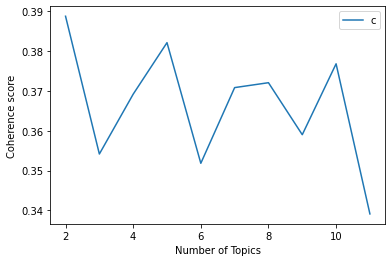

In [10]:
#import required modules
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

#loading data
def load_data(path,file_name):  
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r") as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles



#preprocessing function
def preprocess_data(doc_set): 
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

#preparing corpus function
def prepare_corpus(doc_clean):
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix
#create LSA mosel
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

#number of topics
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

#coherence plot
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()


#calling above functions
number_of_topics=20
words=10
document_list,titles=load_data("/content/","Q3(assig-3).csv")
clean_text=preprocess_data(document_list)
model=create_gensim_lsa_model(clean_text,number_of_topics,words)
start,stop,step=2,12,1
plot_graph(clean_text,start,stop,step)



In [ ]:
#LSA Summarization
1.Review- people and character
2. About joker wanting everything
3. Review about good play and character
4 .Review- good movie and about actor
5. review- good play and best action
6. Review- feel good movie
7. Review - about good story
8. Review about joaquin different action
9. Oscar winning character
10. Review on actor best laugh
11. Reviews on feel good movie
12. Review on comic
13. Review on mental ill and phoenix
14 .Review on mental illnes
15. Review as dark comic
16. Review as good phoenix scenes
17. Review on one character
18. Review on oscar and laugh
19. Review on taxi driver
20. Review on good action

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [11]:
#Collecting Data from IMDB 
import pandas as pd
dataframe = pd.read_csv('/content/Q3(assig-3).csv',sep=',',engine ='python', header=0)
dataframe.keys()
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

#Cleaning
#remove punctuation
dataframe["punctuationremoval"] = dataframe["Review"].str.replace('[^\w\s]','')
#remove special chars
dataframe['special_chars'] = dataframe["punctuationremoval"].str.replace('[^A-Za-z0-9 ]+','')
#remove Numbers
dataframe['nums_removed'] = dataframe["special_chars"].str.replace('[^A-Za-z ]+','')

#extract stopwords
import requests
data = requests.get("https://gist.githubusercontent.com/sebleier/554280/raw/7e0e4a1ce04c2bb7bd41089c9821dbcf6d0c786c/NLTK's%2520list%2520of%2520english%2520stopwords")
a = data.text
stop = a.split()

#stopwords
dataframe['stopwords'] = dataframe["nums_removed"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

#lowercase
dataframe["lower_case"] = dataframe['stopwords'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#tokenizing data for next step - stemming
import nltk
from textblob import TextBlob
nltk.download('punkt')
dataframe["tokenization"] = dataframe["lower_case"].apply(lambda x: TextBlob(x).words)
dataframe

#stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
dataframe["stemming"]= dataframe["tokenization"].apply(lambda x: " ".join([st.stem(word) for word in x]))

#Lemmatization
from textblob import Word
import nltk
nltk.download('wordnet')
dataframe["lemmatization"] = dataframe["stemming"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
dataframe

#save cleaned data to csv file
dataframe.to_csv("resultfile.csv")



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [12]:
#SVM Analysis

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, accuracy_score

#Reference - https://medium.com/@bedigunjit/simple-guide-to-text-classification-nlp-using-svm-and-naive-bayes-with-python-421db3a72d34
Train_X, Test_X, Train_Y, Test_Y = train_test_split(dataframe['Review'],dataframe['sentiment'],test_size=0.3)
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)
Tfidf_vect = TfidfVectorizer(max_features= 5000, use_idf = True )
Train_X_vectors = Tfidf_vect.fit_transform(Train_X)
Test_X_vectors = Tfidf_vect.transform(Test_X)


from sklearn import svm
from sklearn.metrics import classification_report
svm_model = svm.SVC(kernel='linear')
svm_model.fit(Train_X_vectors, Train_Y)
predicted = svm_model.predict(Test_X_vectors)
svmreport = classification_report(Test_Y, predicted, output_dict=True, zero_division=0  )
print("SVM \nAccuracy: ",accuracy_score(predicted, Test_Y)*100, "\nF1 score", svmreport['macro avg']['f1-score'], "\n\n" )
svmreport

SVM 
Accuracy:  78.125 
F1 score 0.5555555555555556 




{'0': {'f1-score': 0.8333333333333334,
  'precision': 0.75,
  'recall': 0.9375,
  'support': 16},
 '1': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 4},
 '2': {'f1-score': 0.8333333333333334,
  'precision': 0.8333333333333334,
  'recall': 0.8333333333333334,
  'support': 12},
 'accuracy': 0.78125,
 'macro avg': {'f1-score': 0.5555555555555556,
  'precision': 0.5277777777777778,
  'recall': 0.5902777777777778,
  'support': 32},
 'weighted avg': {'f1-score': 0.7291666666666667,
  'precision': 0.6875,
  'recall': 0.78125,
  'support': 32}}

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(Train_X_vectors, Train_Y)
dt_predicted = dt_model.predict(Test_X_vectors)
dt_report = classification_report(Test_Y, dt_predicted, output_dict=True, zero_division=0)
print("Decision Tree \nAccuracy: ",accuracy_score(Test_Y,dt_predicted )*100, "\nF1 score", dt_report['macro avg']['f1-score'], "\n\n" )
dt_report


Decision Tree 
Accuracy:  37.5 
F1 score 0.3414529914529914 




{'0': {'f1-score': 0.4666666666666667,
  'precision': 0.5,
  'recall': 0.4375,
  'support': 16},
 '1': {'f1-score': 0.25, 'precision': 0.25, 'recall': 0.25, 'support': 4},
 '2': {'f1-score': 0.30769230769230765,
  'precision': 0.2857142857142857,
  'recall': 0.3333333333333333,
  'support': 12},
 'accuracy': 0.375,
 'macro avg': {'f1-score': 0.3414529914529914,
  'precision': 0.3452380952380952,
  'recall': 0.34027777777777773,
  'support': 32},
 'weighted avg': {'f1-score': 0.3799679487179487,
  'precision': 0.38839285714285715,
  'recall': 0.375,
  'support': 32}}

In [14]:
#Sentiment Analysis with TextBlob
from textblob import TextBlob
textblobsentiment = []
for item in dataframe['lemmatization']:
  polarity = TextBlob(item).sentiment.polarity
  if polarity > 0 :
    textblobsentiment.append("positive")
  elif polarity < 0:
    textblobsentiment.append("negative")
  elif polarity == 0:
    textblobsentiment.append("neutral")
sentimentDataframe = pd.DataFrame(list(zip(dataframe['lower_case'], dataframe['sentiment'], textblobsentiment)), columns = ['Review', 'Actual', 'TextBlobPredicted'])
sentimentDataframe

,Review,Actual,TextBlobPredicted
0,every movie comes truly makes impact joaquins ...,positive,negative
1,this movie felt alone isolated truly relate yo...,positive,positive
2,truly masterpiece the best hollywood film one ...,positive,positive
3,joaquin phoenix gives tour de force performanc...,positive,negative
4,most time movies anticipated like end falling ...,positive,positive
...,...,...,...
101,one worst movies i ever seen ok maybe hype sur...,negative,neutral
102,i didnt really know much movie i hadnt seen tr...,negative,positive
103,film directed produced poorly opportunity take...,negative,negative
104,wow movie i admit when i first heard joaquin p...,positive,positive


In [15]:
#Calculate Accuracy and F1 Score for TextBlob Sentiment Analysis
from sklearn.metrics import f1_score, accuracy_score
txtblobaccuracy = accuracy_score(sentimentDataframe['Actual'], sentimentDataframe['TextBlobPredicted'])*100
txtblobscore = f1_score(sentimentDataframe['Actual'], sentimentDataframe['TextBlobPredicted'], average = 'macro')
print("TextBlob \nAccuracy: ",txtblobaccuracy,"\nF1 Score: ", txtblobscore)

TextBlob 
Accuracy:  49.056603773584904 
F1 Score:  0.3620689655172414


# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731_spring2021/blob/main/assignment/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [17]:
#reading data from files
import pandas as pd
train_data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")

In [18]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [20]:
test_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [21]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [22]:
#checking and removing null values(https://medium.com/@meetpatel12121995/handling-missing-values-d4b3378af549)
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [23]:
test_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [24]:
train_data.fillna(train_data.mean(),inplace = True)
test_data.fillna(test_data.mean(),inplace = True)

In [25]:
train_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [26]:
test_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 80, dtype: int64

In [27]:
#corelation matrix
corr_matrix = train_data.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

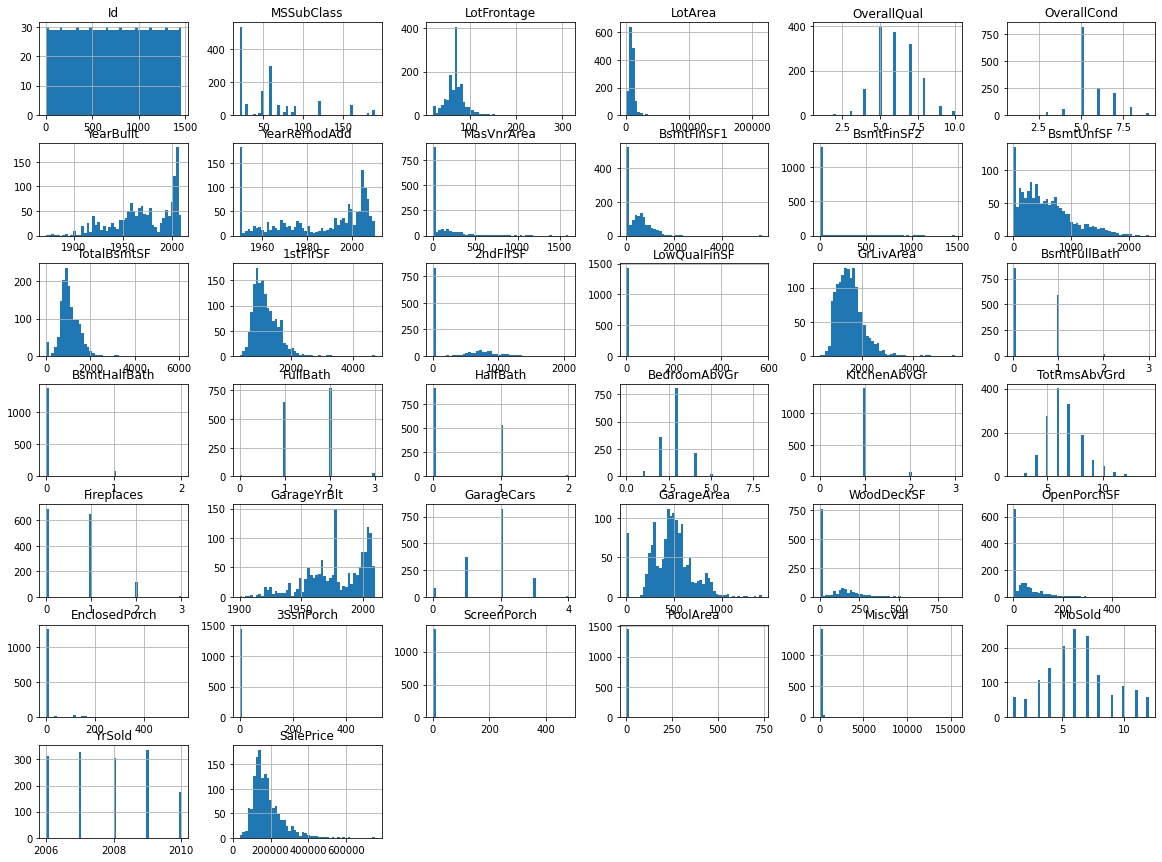

In [28]:
#histogram plotting
%matplotlib inline
import matplotlib.pyplot as plt
train_data.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plotstrain")
plt.show()


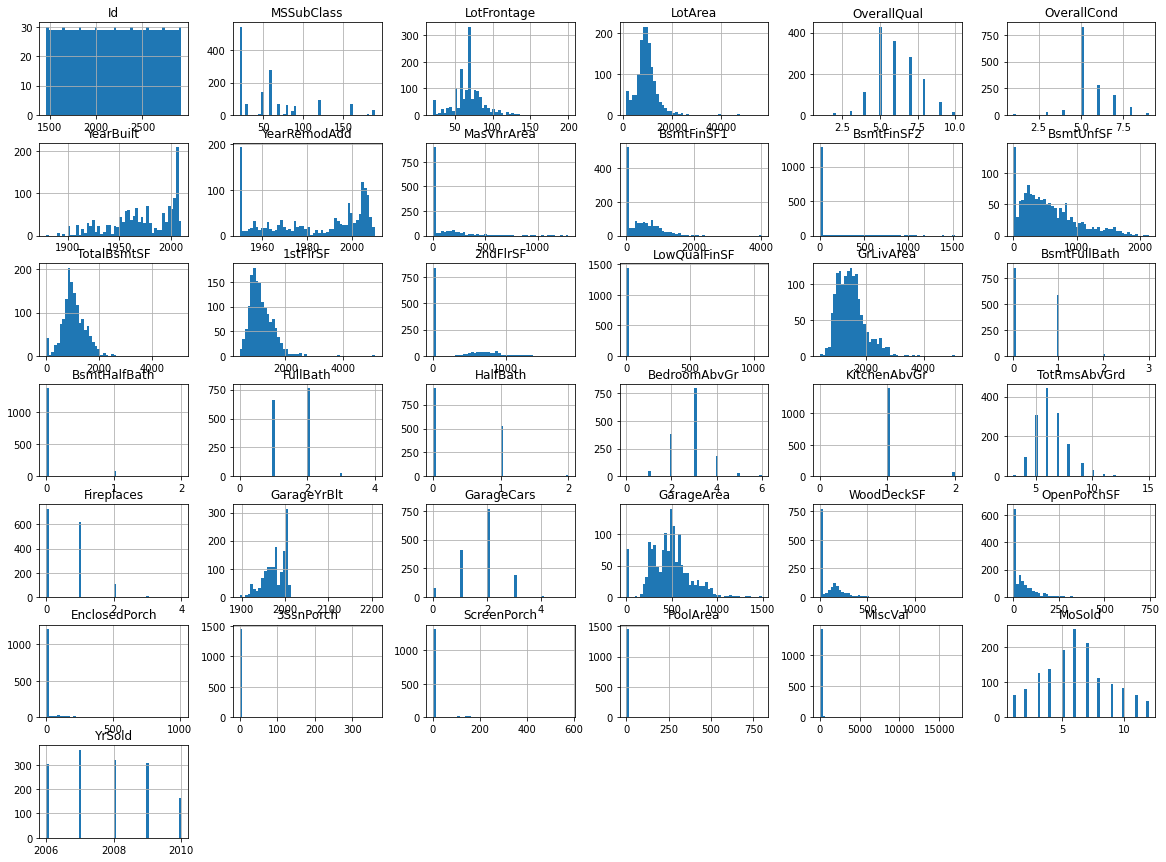

In [29]:
#histogram plotting for test data
test_data.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plotstest")
plt.show()

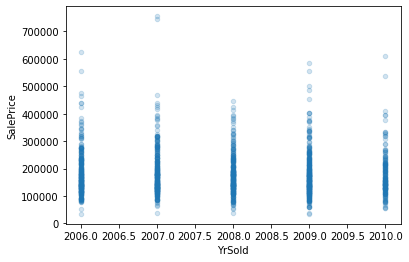

In [30]:
#scatter plot
train_data.plot(kind="scatter", x="YrSold", y="SalePrice", alpha=0.2)
plt.savefig('scatterplottrain.png')

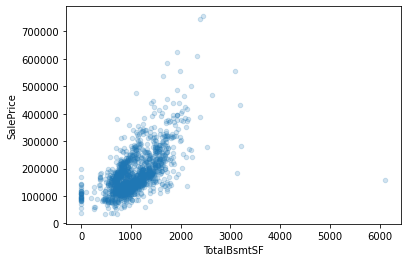

In [31]:
train_data.plot(kind="scatter", x="TotalBsmtSF", y="SalePrice", alpha=0.2)
plt.savefig('scatterplottrain2.png')

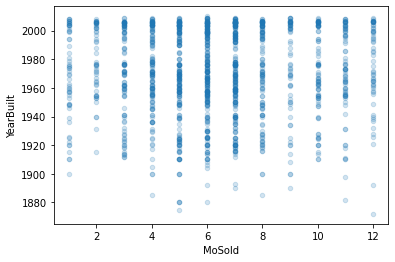

In [32]:
train_data.plot(kind="scatter", x="MoSold", y="YearBuilt", alpha=0.2)
plt.savefig('scatterplottrain3.png')

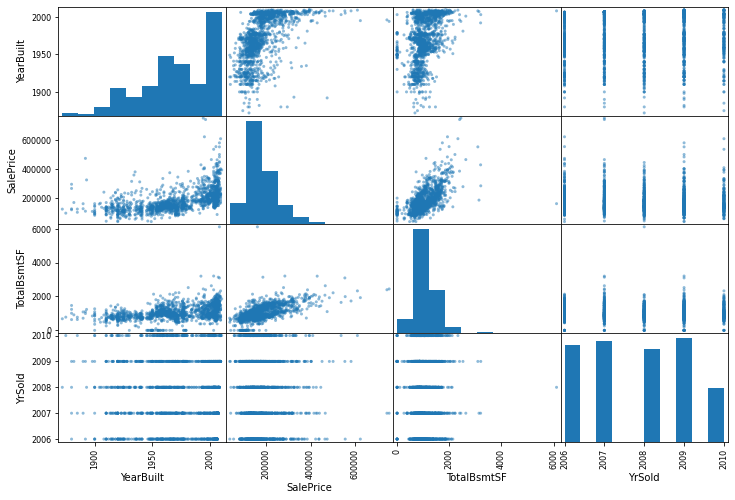

In [33]:
from pandas.plotting import scatter_matrix
attributes = ["YearBuilt", "SalePrice", "TotalBsmtSF", "YrSold"]
scatter_matrix(train_data[attributes], figsize=(12, 8))
plt.savefig('scatter_matrixtrain.png')

In [34]:
test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

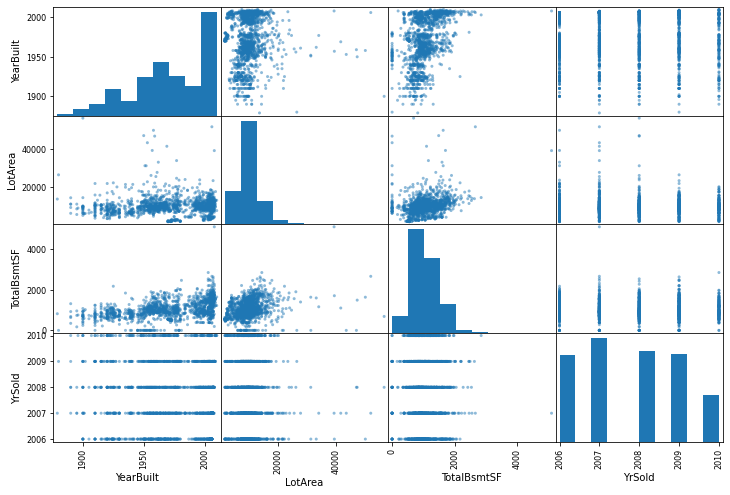

In [35]:
from pandas.plotting import scatter_matrix
attributes = ["YearBuilt", "LotArea", "TotalBsmtSF", "YrSold"]
scatter_matrix(test_data[attributes], figsize=(12, 8))
plt.savefig('scattermatrix_test.png')

In [36]:
X = train_data[["YearBuilt", "LotArea", "TotalBsmtSF", "YrSold", "LotShape", "LandContour"]]
Y = train_data['SalePrice']
n = pd.get_dummies(train_data.LotShape)
X = pd.concat([X, n], axis=1)
m = pd.get_dummies(train_data.LandContour)
X = pd.concat([X, m], axis=1)
drops = ["LotShape", "LandContour"]
X.drop(drops, inplace=True, axis=1)
X.head()

,YearBuilt,LotArea,TotalBsmtSF,YrSold,IR1,IR2,IR3,Reg,Bnk,HLS,Low,Lvl
0,2003,8450,856,2008,0,0,0,1,0,0,0,1
1,1976,9600,1262,2007,0,0,0,1,0,0,0,1
2,2001,11250,920,2008,1,0,0,0,0,0,0,1
3,1915,9550,756,2006,1,0,0,0,0,0,0,1
4,2000,14260,1145,2008,1,0,0,0,0,0,0,1


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
import numpy as np
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)
feature_labels = np.array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'])
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

Alley-0.01%
Utilities-0.06%
LotConfig-0.10%
LotArea-0.16%
LotFrontage-0.23%
LandSlope-0.37%
LotShape-0.56%
Street-0.77%
LandContour-1.03%
MSSubClass-18.67%
Id-38.83%
MSZoning-39.22%


In [39]:
#train and building 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))
predictions = pd.DataFrame( y_pred, columns=["House Value Predictions"])
predictions

Linear Regression R squared": 0.4685


,House Value Predictions
0,288505.030718
1,130184.298788
2,145917.821895
3,188357.683933
4,115731.144891
...,...
433,202374.206816
434,193054.964529
435,299012.988482
436,256275.813034


In [41]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 60071.8387


In [42]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: %.4f' % lin_mae)

Linear Regression MAE: 40563.4665
